In [1]:
!pip install google-generativeai pandas matplotlib python-dotenv


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os
from dotenv import load_dotenv
import google.generativeai as genai

# Load from .env
load_dotenv()
genai.configure(api_key=os.getenv("GEMINI_API_KEY"))

# Load the fast Gemini 1.5 Flash model
model = genai.GenerativeModel("models/gemini-1.5-flash-latest")


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import pandas as pd

df = pd.read_csv("player_stats.csv")  # replace with your actual file
df.head()


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,MIN,FGM,...,PF,PTS,PLUS_MINUS,IS_STARTER,EFF,TS_PCT,EFF_scaled,TS_PCT_scaled,MIN_scaled,IMPACT_SCORE
0,22400061,1610612752,NYK,New York,1628384,OG Anunoby,OG,F,34.17,1.0,...,3.0,4.0,-21.0,1,7.0,0.253807,0.215686,0.253807,0.781358,0.396824
1,22400061,1610612752,NYK,New York,1628404,Josh Hart,Josh,F,24.50,4.0,...,0.0,12.0,-23.0,1,14.0,0.694444,0.352941,0.694444,0.558803,0.517151
2,22400061,1610612752,NYK,New York,1626157,Karl-Anthony Towns,Karl-Anthony,C,23.62,5.0,...,1.0,12.0,-18.0,1,18.0,0.635593,0.431373,0.635593,0.538550,0.524792
3,22400061,1610612752,NYK,New York,1628969,Mikal Bridges,Mikal,G,34.62,7.0,...,0.0,16.0,-33.0,1,10.0,0.595238,0.274510,0.595238,0.791715,0.525890
4,22400061,1610612752,NYK,New York,1628973,Jalen Brunson,Jalen,G,24.50,9.0,...,3.0,22.0,-23.0,1,16.0,0.718016,0.392157,0.718016,0.558803,0.539908


In [7]:
team_avg = df.groupby('TEAM_ABBREVIATION')[['PTS', 'REB', 'AST', 'STL', 'BLK']].mean().reset_index()
print(team_avg)

prompt = f"""
Summarize the performance of NBA teams based on the following stats:
{team_avg.head(10).to_string(index=False)}
"""


   TEAM_ABBREVIATION        PTS       REB       AST       STL       BLK
0                ATL  14.437500  4.750000  3.062500  1.375000  1.000000
1                BKN  10.333333  3.809524  2.047619  0.714286  0.428571
2                BOS  10.160000  3.560000  2.160000  0.520000  0.240000
3                CHA  11.500000  5.450000  2.100000  0.650000  0.700000
4                CHI  10.478261  4.043478  2.434783  0.608696  0.260870
5                CLE   9.772727  3.045455  2.500000  0.954545  0.590909
6                DAL   9.230769  3.846154  2.076923  0.692308  0.384615
7                DEN   6.214286  4.071429  2.071429  0.785714  0.500000
8                DET   9.130435  3.478261  2.043478  0.391304  0.304348
9                GSW   9.653846  4.230769  2.692308  1.038462  0.346154
10               HOU  10.454545  4.772727  1.772727  0.818182  0.363636
11               IND   8.115385  2.769231  2.307692  0.692308  0.538462
12               LAC  11.333333  5.333333  2.888889  0.888889  0

In [8]:
response = model.generate_content(prompt)
print(response.text)

Based on the provided statistics (PTS=Points, REB=Rebounds, AST=Assists, STL=Steals, BLK=Blocks), the Atlanta Hawks (ATL) exhibit the strongest overall performance across all categories.  They significantly lead in points (PTS) and rebounds (REB).

Other teams show varying strengths and weaknesses:  Charlotte (CHA) displays a strong rebounding presence, while Golden State (GSW) is notable for its steals (STL).  Cleveland (CLE) has a good number of blocks (BLK).  The remaining teams (BKN, BOS, CHI, CLE, DAL, DEN, DET, GSW) show comparatively lower scores across the board, with no team excelling significantly in multiple categories except for the aspects mentioned above.  It's important to note that this is a limited dataset and a full team performance evaluation would require more comprehensive data.



In [9]:
player_name = "Jayson Tatum"
player_stats = df[df["PLAYER_NAME"] == player_name].mean(numeric_only=True).to_dict()

prompt = f"""
Generate a performance report card for {player_name} using the following stats:
{player_stats}
"""
response = model.generate_content(prompt)
print(response.text)


**Jayson Tatum Performance Report Card - Game ID: 22400067**

**Overall Grade:** A+

**Offensive Performance:**

* **Scoring (PTS):**  Exceptional (31 points).  Demonstrated consistent scoring ability across all three levels.
* **Shooting Efficiency (FG_PCT, FG3_PCT, TS_PCT):** Excellent (61.4% FG, 50% 3PT, 76.1% TS%). Highly efficient scoring night, showcasing excellent shot selection and accuracy.
* **Playmaking (AST):**  Strong (8 assists). Showcased improved court vision and ability to create scoring opportunities for teammates.
* **Offensive Rebounding (OREB):**  Average (1 offensive rebound). Room for improvement in securing more offensive possessions.

**Defensive Performance:**

* **Rebounding (REB):**  Good (7.5 rebounds). Contributed significantly to the team's rebounding efforts.
* **Steals/Blocks (STL, BLK):**  Adequate (1 steal, 0.5 blocks).  Can still improve his defensive impact in generating turnovers.
* **Personal Fouls (PF):** Excellent (1 foul). Demonstrated excellen

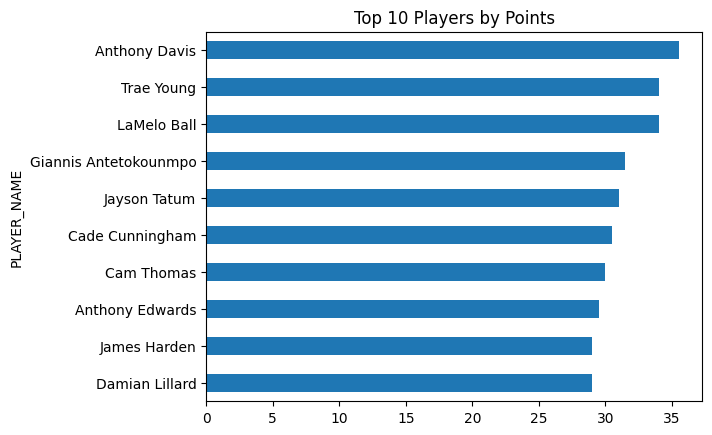

This bar chart displays the top 10 players in the NBA, ranked by their average points per game.  It shows that Anthony Davis leads the pack with an average of 35.5 points per game, significantly higher than the rest of the top 10.  Trae Young and LaMelo Ball are tied for second place at 34.0 points per game.  The remaining players follow in descending order, with a relatively closer grouping of scores between approximately 29 and 31 points per game.  The chart highlights the scoring prowess of these ten players, showcasing their individual offensive contributions to their respective teams.  Note that this data represents *averages* and is likely taken over a specific timeframe (a season or part of a season), and the ranking could shift with future game performance.



In [10]:
import matplotlib.pyplot as plt

top_pts = df.groupby('PLAYER_NAME')['PTS'].mean().sort_values(ascending=False).head(10)

top_pts.plot(kind='barh', title='Top 10 Players by Points')
plt.gca().invert_yaxis()
plt.show()

prompt = f"""
Explain this bar chart of top 10 NBA players by average points per game:
{top_pts.to_string()}
"""
response = model.generate_content(prompt)
print(response.text)


In [14]:
columns = list(df.columns)

def ask_gemini_query(query):
    prompt = f"""
You are a pandas expert. Convert this natural language question into valid Python code using DataFrame `df`.
The available columns are: {columns}
Query: \"{query}\"
Return only the code.
"""
    response = model.generate_content(prompt)
    code = response.text.strip().strip("```python").strip("```")
    print("🔍 Generated Code:\n", code)
    try:
        result = eval(code)
        print("✅ Result:\n", result)
    except Exception as e:
        print("❌ Error:", e)

# Example use
ask_gemini_query("Which player has the highest average rebounds?")


🔍 Generated Code:
 
df.groupby('PLAYER_NAME')['REB'].mean().idxmax()


✅ Result:
 Alperen Sengun


In [15]:
df.groupby('PLAYER_NAME')['REB'].sum().sort_values(ascending=False).head(1)


PLAYER_NAME
Alperen Sengun    33.0
Name: REB, dtype: float64